In [3]:
import tpqoa
api = tpqoa.tpqoa('pyalgo.cfg')

In [4]:
api.get_instruments()[:15]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Bitcoin', 'BTC_USD'),
 ('Bitcoin Cash', 'BCH_USD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY')]

In [5]:
help(api.get_history)

Help on method get_history in module tpqoa.tpqoa:

get_history(instrument, start, end, granularity, price, localize=True) method of tpqoa.tpqoa.tpqoa instance
    Retrieves historical data for instrument.

    Parameters
    instrument: string
        valid instrument name
    start, end: datetime, str
        Python datetime or string objects for start and end
    granularity: string
        a string like 'S5', 'M1' or 'D'
    price: string
        one of 'A' (ask), 'B' (bid) or 'M' (middle)

    Returns
    data: pd.DataFrame
        pandas DataFrame object with data



In [15]:
instrument = 'EUR_USD'  
start = '2020-08-10'  
end = '2020-08-12'  
granularity = 'M1'  
price = 'M'

In [16]:
data = api.get_history(instrument, start, end, granularity, price)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2020-08-10 00:00:00 to 2020-08-11 23:59:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         2814 non-null   float64
 1   h         2814 non-null   float64
 2   l         2814 non-null   float64
 3   c         2814 non-null   float64
 4   volume    2814 non-null   int64  
 5   complete  2814 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 134.7 KB


In [17]:
data[['c', 'volume']].head()

,c,volume
time,,
2020-08-10 00:00:00,1.17822,18
2020-08-10 00:01:00,1.17836,32
2020-08-10 00:02:00,1.17828,25
2020-08-10 00:03:00,1.17834,13
2020-08-10 00:04:00,1.17847,43


In [20]:
import numpy as np
data['returns'] = np.log(data['c'] / data['c'].shift(1))
cols = []
for momentum in [15,30,60,120]:
    col = 'position_{}'.format(momentum)  
    data[col] = np.sign(data['returns'].rolling(momentum).mean())  
    cols.append(col)

In [22]:
data.head()

,o,h,l,c,volume,complete,return,position_15,position_30,position_60,position_120,returns
time,,,,,,,,,,,,
2020-08-10 00:00:00,1.17814,1.17822,1.17814,1.17822,18,True,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-10 00:01:00,1.17823,1.17841,1.17822,1.17836,32,True,0.000119,NaN,NaN,NaN,NaN,0.000119
2020-08-10 00:02:00,1.17834,1.17834,1.17826,1.17828,25,True,-0.000068,NaN,NaN,NaN,NaN,-0.000068
2020-08-10 00:03:00,1.17827,1.17834,1.17827,1.17834,13,True,0.000051,NaN,NaN,NaN,NaN,0.000051
2020-08-10 00:04:00,1.17836,1.17852,1.17836,1.17847,43,True,0.000110,NaN,NaN,NaN,NaN,0.000110


TypeError: 'bool' object is not callable

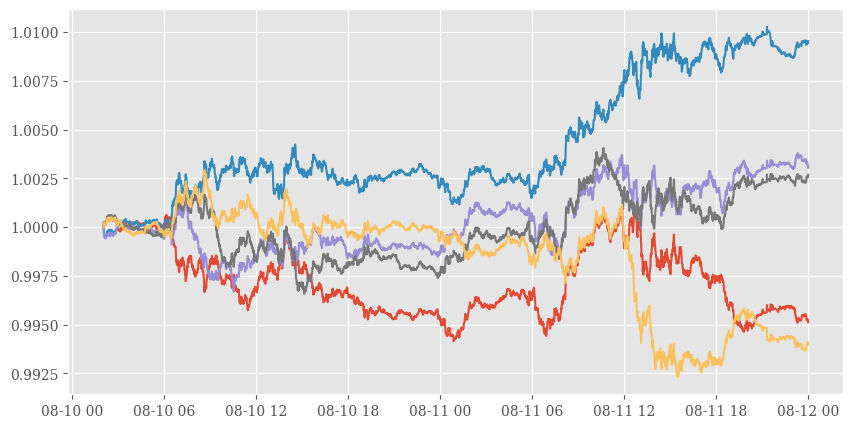

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

strats = ['returns']
for col in cols:  
     strat = 'strategy_{}'.format(col.split('_')[1])  
     data[strat] = data[col].shift(1) * data['returns']  
     strats.append(strat)

# fig, ax = plt.subplots(figsize=(12, 6))
plt.figure(figsize=(10, 5))
plt.plot(data[strats].dropna().cumsum().apply(np.exp))
# data[strats].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
plt.grid(True)
plt.tight_layout()
plt.show()

# Margin 20:1

plt.figure(figsize=(10, 5))
plt.plot(data[strats].dropna().cumsum().apply(lambda x: x*20).apply(np.exp))
#plt.grid(True)
plt.tight_layout()
plt.show()

# Work with Streaming data

In [41]:
api.stream_data(instrument, stop=10)

2025-04-15T13:17:03.941048875Z 1.13138 1.13148
2025-04-15T13:17:04.326657296Z 1.13144 1.13156
2025-04-15T13:17:04.591862457Z 1.13145 1.13156
2025-04-15T13:17:05.112339138Z 1.13145 1.13155
2025-04-15T13:17:05.394937484Z 1.13145 1.13154
2025-04-15T13:17:05.898694256Z 1.13144 1.13154
2025-04-15T13:17:06.438462987Z 1.13141 1.13149
2025-04-15T13:17:06.777534883Z 1.13141 1.13149
2025-04-15T13:17:06.952528217Z 1.13139 1.13149
2025-04-15T13:17:07.582039084Z 1.13143 1.13154


In [42]:
help(api.stream_data)

Help on method stream_data in module tpqoa.tpqoa:

stream_data(instrument, stop=None, ret=False, callback=None) method of tpqoa.tpqoa.tpqoa instance
    Starts a real-time data stream.

    Parameters
    instrument: string
        valid instrument name



# Test command

In [43]:
# Opens a long position via market order.
api.create_order(instrument, 1000)



 {'id': '5', 'time': '2025-04-15T13:19:33.920554941Z', 'userID': 31516200, 'accountID': '101-011-31516200-001', 'batchID': '4', 'requestID': '97389891932642885', 'type': 'ORDER_FILL', 'orderID': '4', 'instrument': 'EUR_USD', 'units': '1000.0', 'gainQuoteHomeConversionFactor': '1.559707828291', 'lossQuoteHomeConversionFactor': '1.575383283852', 'price': 1.13106, 'fullVWAP': 1.13106, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.13095, 'liquidity': '500000'}, {'price': 1.13094, 'liquidity': '2500000'}, {'price': 1.13093, 'liquidity': '2000000'}, {'price': 1.13092, 'liquidity': '5000000'}, {'price': 1.13089, 'liquidity': '10000000'}, {'price': 1.13086, 'liquidity': '10000000'}], 'asks': [{'price': 1.13106, 'liquidity': '500000'}, {'price': 1.13107, 'liquidity': '500000'}, {'price': 1.13108, 'liquidity': '2000000'}, {'price': 1.13109, 'liquidity': '2000000'}, {'price': 1.1311, 'liquidity': '5000000'}, {'price': 1.13112, 'liquidity': '10000000'}, {'price': 1.13115, 'liquidity': '100

# Implementing Trading Strategies in Real Time

In [44]:
import tpqoa
import numpy as np
import pandas as pd


class MomentumTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, momentum, units,
                 *args, **kwargs):
        super(MomentumTrader, self).__init__(conf_file)
        self.position = 0  
        self.instrument = instrument  
        self.momentum = momentum  
        self.bar_length = bar_length  # Length of the bar for the resampling of the tick data.
        self.units = units  # Number of units to be traded
        self.raw_data = pd.DataFrame()  # An empty DataFrame object to be filled with tick data
        self.min_length = self.momentum + 1  # The initial minimum bar length for the start of the trading itself

    # This method is called whenever new tick data arrives.
    def on_success(self, time, bid, ask):  
        ''' Takes actions when new tick data arrives. '''
        print(self.ticks, end=' ')   # The number of ticks retrieved is printed.
        self.raw_data = pd.concat([self.raw_data, pd.DataFrame(
            {'bid': bid, 'ask': ask}, index=[pd.Timestamp(time)])])
        self.data = self.raw_data.resample(
            self.bar_length, label='right').last().ffill().iloc[:-1]  # The tick data is then resampled to the appropriate bar length.
        self.data['mid'] = self.data.mean(axis=1)  
        self.data['returns'] = np.log(self.data['mid'] /
                                      self.data['mid'].shift(1))  
        self.data['position'] = np.sign(
            self.data['returns'].rolling(self.momentum).mean())  

        if len(self.data) > self.min_length:  
            self.min_length += 1  
            if self.data['position'].iloc[-1] == 1:  
                if self.position == 0:  
                    self.create_order(self.instrument, self.units)  
                elif self.position == -1:  
                    self.create_order(self.instrument, self.units * 2)  # Convert to position=1
                self.position = 1  
            elif self.data['position'].iloc[-1] == -1:  
                if self.position == 0:  
                    self.create_order(self.instrument, -self.units)  
                elif self.position == 1:  
                    self.create_order(self.instrument, -self.units * 2)  
                self.position = -1  

In [46]:
mt = MomentumTrader('pyalgo.cfg',  
                        instrument=instrument,  
                        bar_length='10s',  
                        momentum=6,  
                        units=10000)

In [48]:
mt.stream_data(mt.instrument, stop=500)

1 2 3 4 5 6 7 8 9 

 {'id': '7', 'time': '2025-04-15T13:46:21.043452064Z', 'userID': 31516200, 'accountID': '101-011-31516200-001', 'batchID': '6', 'requestID': '61361101658944766', 'type': 'ORDER_FILL', 'orderID': '6', 'instrument': 'EUR_USD', 'units': '-10000.0', 'gainQuoteHomeConversionFactor': '1.560625212753', 'lossQuoteHomeConversionFactor': '1.576309888258', 'price': 1.13111, 'fullVWAP': 1.13111, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.13111, 'liquidity': '500000'}, {'price': 1.1311, 'liquidity': '2500000'}, {'price': 1.13109, 'liquidity': '2000000'}, {'price': 1.13108, 'liquidity': '5000000'}, {'price': 1.13105, 'liquidity': '10000000'}, {'price': 1.13102, 'liquidity': '10000000'}], 'asks': [{'price': 1.1312, 'liquidity': '500000'}, {'price': 1.13121, 'liquidity': '500000'}, {'price': 1.13122, 'liquidity': '2000000'}, {'price': 1.13123, 'liquidity': '2000000'}, {'price': 1.13124, 'liquidity': '5000000'}, {'price': 1.13126, 'liquidity': '10000000'}, {'price': 1.13129

In [52]:
# Finally, close out the final position:
# ret=True: Yêu cầu hàm trả về kết quả order dưới dạng dictionary (dict) thay vì in ra màn hình
# suppress=True: Không in thông tin order ra màn hình
oo = mt.create_order(instrument, units=-mt.position * mt.units,
                              ret=True, suppress=True)  
oo

{'id': '15',
 'time': '2025-04-15T13:54:49.276146798Z',
 'userID': 31516200,
 'accountID': '101-011-31516200-001',
 'batchID': '14',
 'requestID': '61361103790219706',
 'type': 'ORDER_FILL',
 'orderID': '14',
 'instrument': 'EUR_USD',
 'units': '-10000.0',
 'gainQuoteHomeConversionFactor': '1.559891221114',
 'lossQuoteHomeConversionFactor': '1.575568519819',
 'price': 1.13184,
 'fullVWAP': 1.13184,
 'fullPrice': {'type': 'PRICE',
  'bids': [{'price': 1.13184, 'liquidity': '500000'},
   {'price': 1.13183, 'liquidity': '2500000'},
   {'price': 1.13182, 'liquidity': '2000000'},
   {'price': 1.13181, 'liquidity': '5000000'},
   {'price': 1.13178, 'liquidity': '10000000'},
   {'price': 1.13175, 'liquidity': '10000000'}],
  'asks': [{'price': 1.13193, 'liquidity': '500000'},
   {'price': 1.13194, 'liquidity': '500000'},
   {'price': 1.13195, 'liquidity': '2000000'},
   {'price': 1.13196, 'liquidity': '2000000'},
   {'price': 1.13197, 'liquidity': '5000000'},
   {'price': 1.13199, 'liquidity'

In [49]:
api.get_account_summary()

{'id': '101-011-31516200-001',
 'alias': 'Primary',
 'currency': 'AUD',
 'balance': '99994.9266',
 'createdByUserID': 31516200,
 'createdTime': '2025-04-15T12:18:10.567088986Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-5.0734',
 'resettablePL': '-5.0734',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.02',
 'openTradeCount': 1,
 'openPositionCount': 1,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '-8.6652',
 'NAV': '99986.2614',
 'marginUsed': '650.0653',
 'marginAvailable': '99337.1015',
 'positionValue': '19521.48',
 'marginCloseoutUnrealizedPL': '-7.7598',
 'marginCloseoutNAV': '99987.1668',
 'marginCloseoutMarginUsed': '650.0653',
 'marginCloseoutPercent': '0.00325',
 'marginCloseoutPositionValue': '19521.48',
 'withdrawalLimit': '99337.1015',
 'marginCallMarginUsed': '650.0653',
 'marginCallPercent': '0.0065',
 'lastTransactionID': '13'}

In [53]:
api.get_transactions(tid=int(oo['id']) - 2)

[{'id': '14',
  'time': '2025-04-15T13:54:49.276146798Z',
  'userID': 31516200,
  'accountID': '101-011-31516200-001',
  'batchID': '14',
  'requestID': '61361103790219706',
  'type': 'MARKET_ORDER',
  'instrument': 'EUR_USD',
  'units': '-10000.0',
  'timeInForce': 'FOK',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER'},
 {'id': '15',
  'time': '2025-04-15T13:54:49.276146798Z',
  'userID': 31516200,
  'accountID': '101-011-31516200-001',
  'batchID': '14',
  'requestID': '61361103790219706',
  'type': 'ORDER_FILL',
  'orderID': '14',
  'instrument': 'EUR_USD',
  'units': '-10000.0',
  'gainQuoteHomeConversionFactor': '1.559891221114',
  'lossQuoteHomeConversionFactor': '1.575568519819',
  'price': 1.13184,
  'fullVWAP': 1.13184,
  'fullPrice': {'type': 'PRICE',
   'bids': [{'price': 1.13184, 'liquidity': '500000'},
    {'price': 1.13183, 'liquidity': '2500000'},
    {'price': 1.13182, 'liquidity': '2000000'},
    {'price': 1.13181, 'liquidity': '5000000'},
    {'price': 1.1317

In [55]:
help(api.create_order)

Help on method create_order in module tpqoa.tpqoa:

create_order(instrument, units, price=None, sl_distance=None, tsl_distance=None, tp_price=None, comment=None, touch=False, suppress=False, ret=False) method of tpqoa.tpqoa.tpqoa instance
    Places order with Oanda.

    Parameters
    instrument: string
        valid instrument name
    units: int
        number of units of instrument to be bought
        (positive int, eg 'units=50')
        or to be sold (negative int, eg 'units=-100')
    price: float
        limit order price, touch order price
    sl_distance: float
        stop loss distance price, mandatory eg in Germany
    tsl_distance: float
        trailing stop loss distance
    tp_price: float
        take profit price to be used for the trade
    comment: str
        string
    touch: boolean
        market_if_touched order (requires price to be set)
    suppress: boolean
        whether to suppress print out
    ret: boolean
        whether to return the order object



In [58]:
api.print_transactions(tid=int(oo['id']) - 10)

   7 | 2025-04-15T13:46:21.04 | EUR_USD | -10000.0 |    0.078
   9 | 2025-04-15T13:47:21.12 | EUR_USD |  20000.0 |  -6.2367
  11 | 2025-04-15T13:49:10.76 | EUR_USD | -20000.0 |   7.8896
  13 | 2025-04-15T13:49:51.85 | EUR_USD |  20000.0 |  -6.8043
  15 | 2025-04-15T13:54:49.27 | EUR_USD | -10000.0 | -10.2412


# Archive Code

In [64]:
# price = mt.get_quote(instrument)
# print("Giá hiện tại (mid):", price)

quote = mt.get_prices(instrument)
bid = quote[1]
ask = quote[2]
mid = (bid + ask) / 2
print("Bid:", bid, "Ask:", ask, "Mid:", mid)

"""
mt.create_order(instrument=instrument,
                units=1000,
                order_type='LMT',
                price=1.1305,  # GIÁ mong muốn
                ret=True) 
"""

Bid: 1.13061 Ask: 1.13089 Mid: 1.13075


"\nmt.create_order(instrument=instrument,\n                units=1000,\n                order_type='LMT',\n                price=1.1305,  # GIÁ mong muốn\n                ret=True) "

In [62]:
help(api.get_prices)

Help on method get_prices in module tpqoa.tpqoa:

get_prices(instrument) method of tpqoa.tpqoa.tpqoa instance
    Returns the current BID/ASK prices for instrument.



In [63]:
quote

('2025-04-15T14:05:49.433117121Z', 1.13118, 1.13144)

# ML-Based Trading Strategy

In [5]:
import tpqoa
import pandas as pd
import numpy as np

api = tpqoa.tpqoa('pyalgo.cfg')

In [2]:
# Connects to the API and retrieves the data
instrument = 'EUR_USD'
raw = api.get_history(instrument,
                        start='2024-06-08',
                        end='2024-06-13',
                        granularity='M10', # 10 minutes 
                        price='M')
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2024-06-12 23:10:00,1.08128,1.08146,1.08126,1.08143,206,True
2024-06-12 23:20:00,1.08144,1.08152,1.08142,1.08143,194,True
2024-06-12 23:30:00,1.08144,1.08149,1.08136,1.08136,175,True
2024-06-12 23:40:00,1.08138,1.08149,1.08131,1.08146,142,True
2024-06-12 23:50:00,1.08146,1.08150,1.08126,1.08128,219,True


In [3]:
# Specifies the average bid-ask spread.
spread = 0.00012
mean = raw['c'].mean()

# Calculates the average proportional transactions costs given the average spread and the average mid closing price
ptc = spread / mean
ptc

np.float64(0.00011148796566897393)

In [7]:
data = pd.DataFrame(raw['c'])
data.columns = [instrument,]
window = 20
data['return'] = np.log(data / data.shift(1))
data['vol'] = data['return'].rolling(window).std()
data['mom'] = np.sign(data['return'].rolling(window).mean())
data['sma'] = data[instrument].rolling(window).mean()
data['min'] = data[instrument].rolling(window).min()
data['max'] = data[instrument].rolling(window).max()

# Remove NaN
data.dropna(inplace=True)

# Adds the lagged features data to the DataFrame object. 
lags = 6
features = ['return', 'vol', 'mom', 'sma', 'min', 'max']
cols = []
for f in features:
    for lag in range(1, lags + 1):
        col = f'{f}_lag_{lag}'
        data[col] = data[f].shift(lag)
        cols.append(col)

data.dropna(inplace=True)

data['direction'] = np.where(data['return'] > 0, 1, -1)
data[cols].iloc[:lags, ]

,return_lag_1,return_lag_2,return_lag_3,return_lag_4,return_lag_5,return_lag_6,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,...,min_lag_3,min_lag_4,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6
time,,,,,,,,,,,,,,,,,,,,,
2024-06-10 01:20:00,0.000158,-0.000093,0.000093,0.000093,0.000102,-0.000167,0.000254,0.000272,0.000281,0.000280,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:30:00,-0.000585,0.000158,-0.000093,0.000093,0.000093,0.000102,0.000288,0.000254,0.000272,0.000281,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:40:00,0.000186,-0.000585,0.000158,-0.000093,0.000093,0.000093,0.000233,0.000288,0.000254,0.000272,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:50:00,-0.000009,0.000186,-0.000585,0.000158,-0.000093,0.000093,0.000214,0.000233,0.000288,0.000254,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 02:00:00,0.000028,-0.000009,0.000186,-0.000585,0.000158,-0.000093,0.000209,0.000214,0.000233,0.000288,...,1.07704,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 02:10:00,-0.000251,0.000028,-0.000009,0.000186,-0.000585,0.000158,0.000199,0.000209,0.000214,0.000233,...,1.07724,1.07704,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [10]:
# Specifies major parameters for the ML algorithm
n_estimators=15
random_state=100
max_depth=2
min_samples_leaf=15
subsample=0.33

dtc = DecisionTreeClassifier(random_state=random_state,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)

# Declare model
model = AdaBoostClassifier(estimator=dtc,
                               n_estimators=n_estimators,
                               random_state=random_state)

# Construct data
split = int(len(data) * 0.7)
train = data.iloc[:split].copy()
# Applies Gaussian normalization
mu, std = train.mean(), train.std()
train_ = (train - mu) / std

# Fit the model
model.fit(train_[cols], train['direction'])

accuracy_score(train['direction'], model.predict(train_[cols]))

0.8040540540540541

In [11]:
# Check the test data
test = data.iloc[split:].copy()
test_ = (test - mu) / std

test['position'] = model.predict(test_[cols])
accuracy_score(test['direction'], test['position'])

0.5703125

In [12]:
test.head()

,EUR_USD,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6,direction,position
time,,,,,,,,,,,,,,,,,,,,,
2024-06-12 02:40:00,1.07412,0.000000,0.000092,1.0,1.073878,1.07354,1.07416,-0.000037,0.000093,0.000037,...,1.07354,1.07354,1.07416,1.07416,1.07406,1.07410,1.07411,1.07411,-1,-1
2024-06-12 02:50:00,1.07421,0.000084,0.000094,1.0,1.073890,1.07354,1.07421,0.000000,-0.000037,0.000093,...,1.07354,1.07354,1.07416,1.07416,1.07416,1.07406,1.07410,1.07411,1,1
2024-06-12 03:00:00,1.07416,-0.000047,0.000094,1.0,1.073901,1.07354,1.07421,0.000084,0.000000,-0.000037,...,1.07354,1.07354,1.07421,1.07416,1.07416,1.07416,1.07406,1.07410,-1,-1
2024-06-12 03:10:00,1.07416,0.000000,0.000093,1.0,1.073909,1.07354,1.07421,-0.000047,0.000084,0.000000,...,1.07354,1.07354,1.07421,1.07421,1.07416,1.07416,1.07416,1.07406,-1,1
2024-06-12 03:20:00,1.07416,0.000000,0.000080,1.0,1.073927,1.07354,1.07421,0.000000,-0.000047,0.000084,...,1.07354,1.07354,1.07421,1.07421,1.07421,1.07416,1.07416,1.07416,-1,-1


<Axes: xlabel='time'>

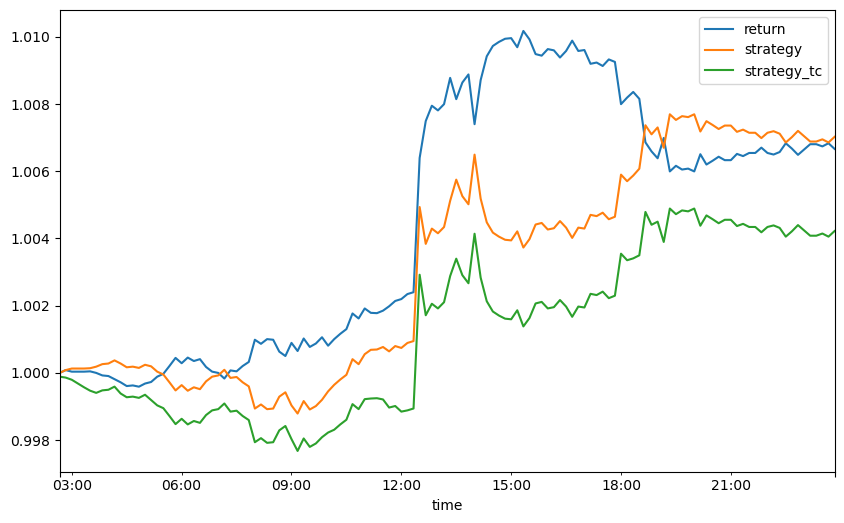

In [14]:
# Check the performance if take into account the proportional transaction cost
test['strategy'] = test['position'] * test['return']
test['strategy_tc'] = np.where(test['position'].diff() != 0,
                                        test['strategy'] - ptc,  
                                        test['strategy'])
test[['return', 'strategy', 'strategy_tc']].cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6))